In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

from sklearn.metrics import precision_score,f1_score
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import KFold
import random


In [16]:
df_test = pd.read_csv('./data/cardio_train.csv', sep=';')

In [2]:
df = pd.read_csv('./all-dataset-and-calculate-BMI-and-remove-height-weight.csv')

df['cholesterol'] = df['cholesterol'].replace({
    1: round(random.uniform(1.0, 5.17),2),
    2: round(random.uniform(5.17, 6.18),2),
    3: round(random.uniform(6.21, 7.21),2)
})

df['gluc'] = df['gluc'].replace({
    1: round(random.uniform(3.5,5.7),2),
    2: round(random.uniform(5.7,6.9),2),
    3: round(random.uniform(7.0,10.4)),
})

df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['pulse_pressure_index'] = df['pulse_pressure'] / df['ap_hi']
df = df.drop('pulse_pressure',axis=1)
df
df_copy = df.copy()

In [3]:
df
df_ensemble = df.copy()

In [4]:
df_ensemble

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure_index
0,50,2,110,80,2.91,3.94,0,0,1,0,22.0,0.272727
1,55,1,140,90,6.49,3.94,0,0,1,1,35.0,0.357143
2,51,1,130,70,6.49,3.94,0,0,0,1,24.0,0.461538
3,48,2,150,100,2.91,3.94,0,0,1,1,29.0,0.333333
4,47,1,100,60,2.91,3.94,0,0,0,0,23.0,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
68970,52,2,120,80,2.91,3.94,1,0,1,0,27.0,0.333333
68971,61,1,140,90,5.27,6.45,0,0,1,1,50.0,0.357143
68972,52,2,180,90,6.49,3.94,0,1,0,1,31.0,0.500000
68973,61,1,135,80,2.91,6.45,0,0,0,1,27.0,0.407407


In [18]:
def view_plot(data):
    plt.figure(figsize=(10,12))
    sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
    plt.show

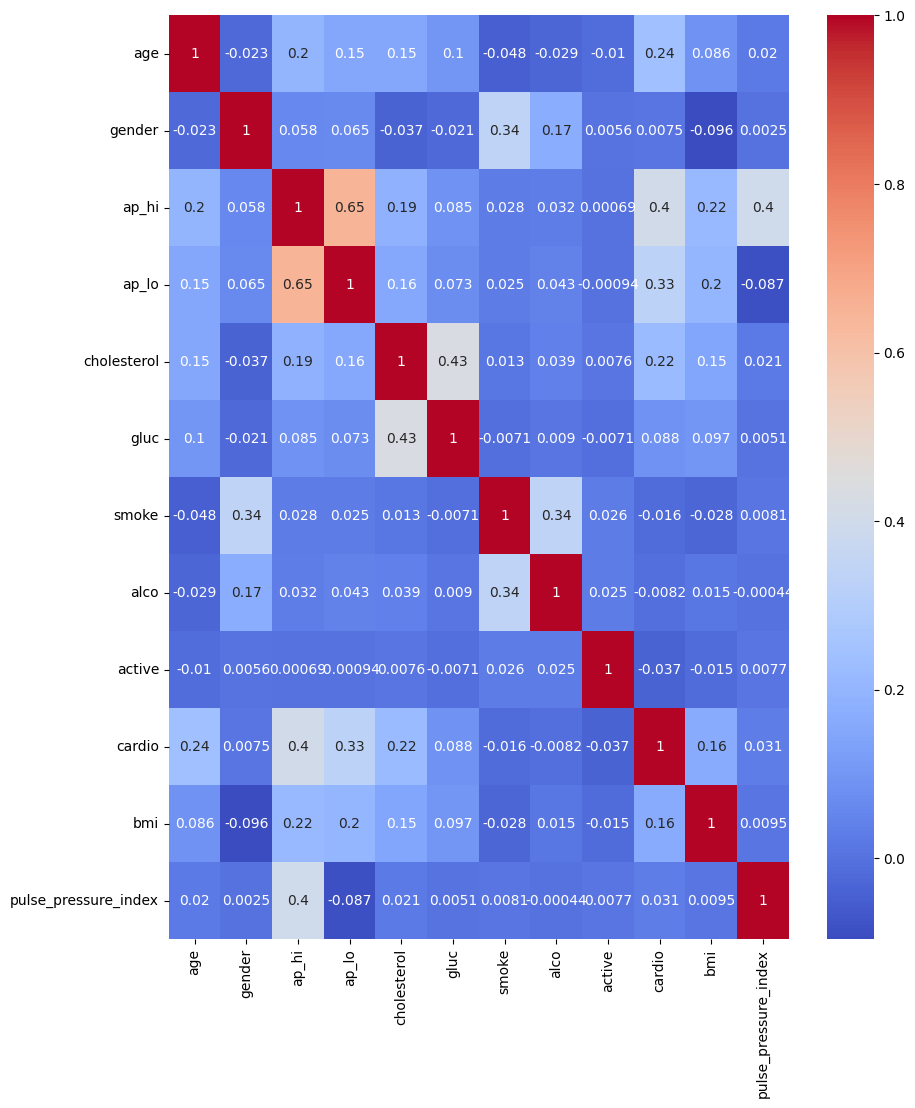

In [20]:
view_plot(df)

In [5]:
X = df.drop('cardio',axis=1)
y = df['cardio']

In [6]:
X,y

(       age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  \
 0       50       2    110     80         2.91  3.94      0     0       1   
 1       55       1    140     90         6.49  3.94      0     0       1   
 2       51       1    130     70         6.49  3.94      0     0       0   
 3       48       2    150    100         2.91  3.94      0     0       1   
 4       47       1    100     60         2.91  3.94      0     0       0   
 ...    ...     ...    ...    ...          ...   ...    ...   ...     ...   
 68970   52       2    120     80         2.91  3.94      1     0       1   
 68971   61       1    140     90         5.27  6.45      0     0       1   
 68972   52       2    180     90         6.49  3.94      0     1       0   
 68973   61       1    135     80         2.91  6.45      0     0       0   
 68974   56       1    120     80         5.27  3.94      0     0       1   
 
         bmi  pulse_pressure_index  
 0      22.0              0.272727  


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((62077, 11), (6898, 11), (62077,), (6898,))

Робимо нормалізацію для датасету та навчаємо модель та обираємо кращу датасет та нормалізацію

In [8]:
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=20000, solver='liblinear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier()
}

Навчаємо модель Logistic Regression
Accuracy: 0.73
Precision: 0.76
F1-score: 0.71


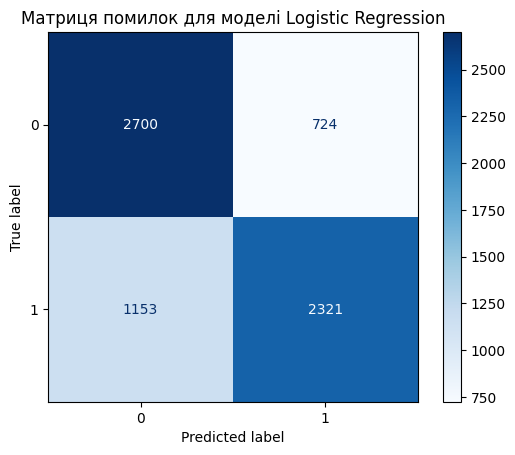

Навчаємо модель Decision Tree
Accuracy: 0.66
Precision: 0.7
F1-score: 0.64


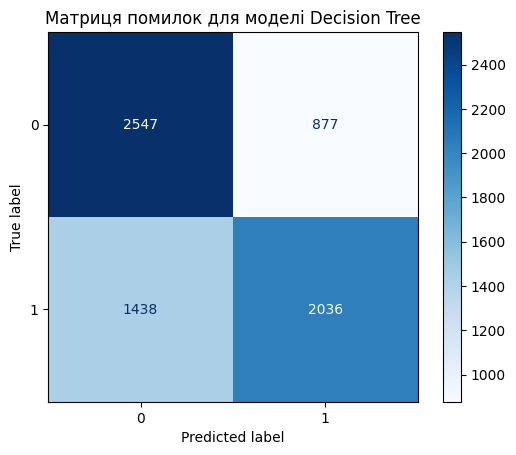

Навчаємо модель Random Forest
Accuracy: 0.7
Precision: 0.72
F1-score: 0.7


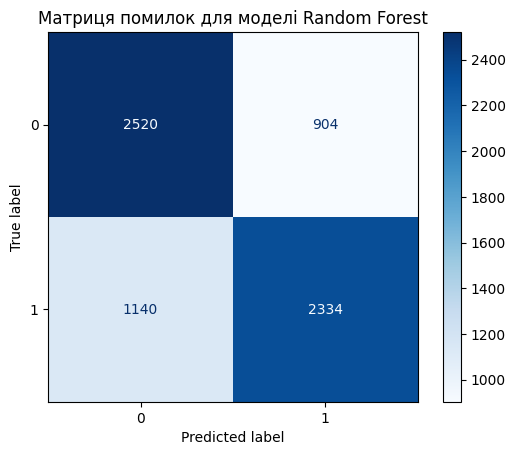

Навчаємо модель KNN
Accuracy: 0.71
Precision: 0.72
F1-score: 0.7


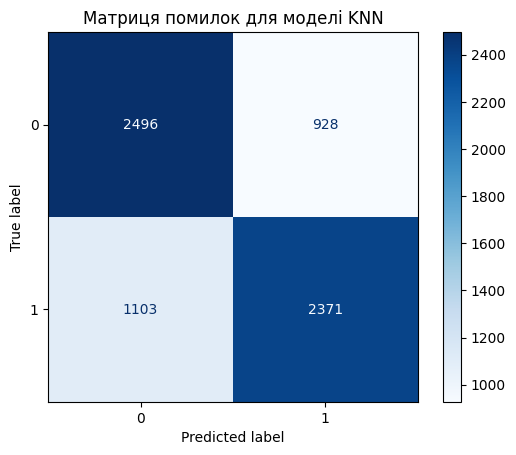




Навчаємо модель Gradient Boosting
Accuracy: 0.74
Precision: 0.77
F1-score: 0.73


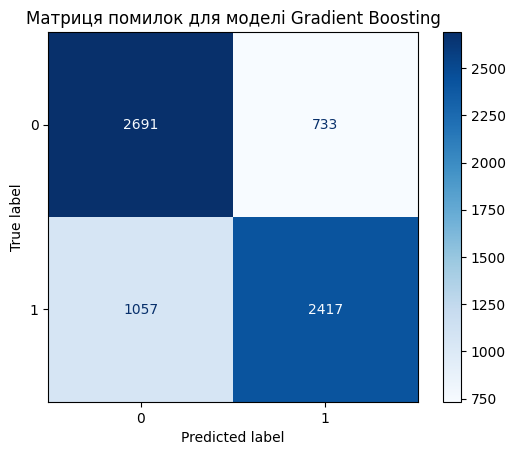

Навчаємо модель XGBoost
Accuracy: 0.74
Precision: 0.77
F1-score: 0.73


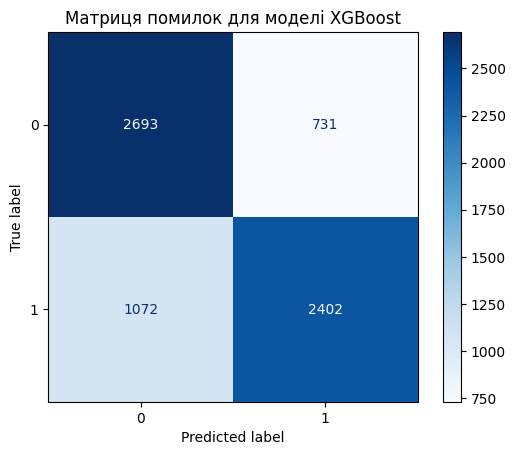

Навчаємо модель AdaBoost


d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.73
Precision: 0.78
F1-score: 0.71


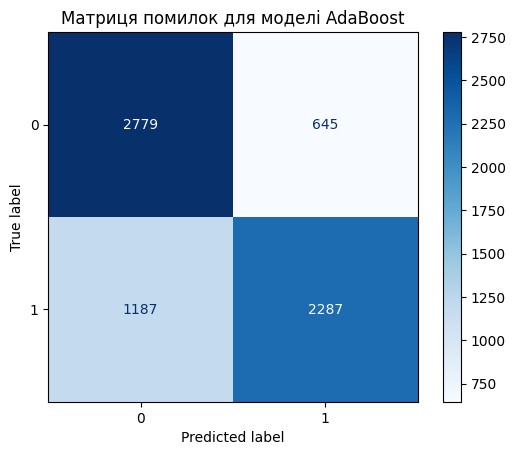

Навчаємо модель Naive Bayes
Accuracy: 0.71
Precision: 0.76
F1-score: 0.68


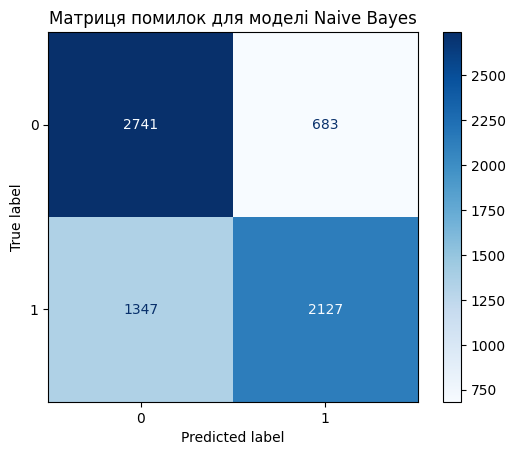

Навчаємо модель MLP Neural Network
Accuracy: 0.74
Precision: 0.76
F1-score: 0.73


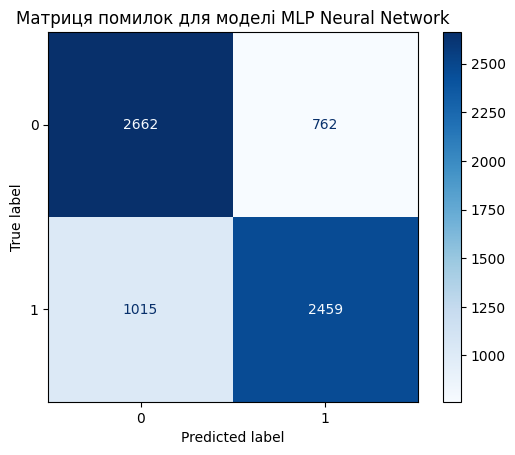

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, f1_score

for name, model in models.items():
    print(f'Навчаємо модель {name}')
    
    # Навчання моделі
    model.fit(X_train, y_train)
    
    # Передбачення на тестовому наборі
    y_pred_test = model.predict(X_test)
    
    # Обчислення метрик
    print(f'Accuracy: {np.round(accuracy_score(y_test, y_pred_test), 2)}')
    print(f'Precision: {np.round(precision_score(y_test, y_pred_test), 2)}')
    print(f'F1-score: {np.round(f1_score(y_test, y_pred_test), 2)}')
    
    # Побудова матриці помилок
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Матриця помилок для моделі {name}')
    plt.show()

    if name == "KNN":
        print("\n\n")

In [15]:


for name, model in models.items():
    print(f'Навчаємо модель {name}')

    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    y_pred_all = np.concatenate([y_pred_train,y_pred_test])
    if len(y_pred_all) == len(df_ensemble):
        df_ensemble[f"{name}_prediction"] = y_pred_all
    else:
        print("Error")


    print(f'Accuracy: {np.round(accuracy_score(y_test, y_pred_test), 2)}')
    print(f'Precision: {np.round(precision_score(y_test,y_pred_test),2)}')
    print(f'F1-score: {np.round(f1_score(y_test,y_pred_test),2)}')

df_ensemble.to_excel('updated_dataset_with_predictions.xlsx', index=False)

# df

Навчаємо модель Logistic Regression
Accuracy: 0.73
Precision: 0.76
F1-score: 0.71
Навчаємо модель KNN
Accuracy: 0.7
Precision: 0.72
F1-score: 0.7
Навчаємо модель Naive Bayes
Accuracy: 0.7
Precision: 0.75
F1-score: 0.68


In [22]:
import plotly.graph_objects as go

fig = go.Figure()

for name,model in models.items():

    model.fit(X_train[:300],y_train[:300])

    predicted = model.predict(X_test[:300])
    residuals = y_test[:300] - predicted

    fig.add_trace(go.Scatter(
        x=list(range(len(y_test[:300]))),
        y=residuals,
        mode='lines+markers',
        name=name
    ))

fig.add_hline(y=0,line_dash="dash",line_color="black",
                annotation_text="Zero Error Line")

fig.update_layout(
    title="Residuals for Validation Set (Interactive)",
    xaxis_title="Index",
    yaxis_title="Residuals (True - Predicted)",
    template="plotly_white",
    showlegend=True
)

fig.write_html("residuals_plot.html")

d:\Heart-Failure\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Спробуємо створити власний ансабиль використовуючи фітчі, якими є передбчення моделей

In [17]:
X_ensemble = df_ensemble.drop('cardio',axis=1)
y_ensemble = df_ensemble['cardio']

X_train_ensemble,X_test_ensemble,y_train_ensemble,y_test_ensemble = train_test_split(X_ensemble,y_ensemble,train_size=0.1)


In [19]:

for name, model in models.items():
    print(f'Навчаємо модель {name}')

    model.fit(X_train_ensemble,y_train_ensemble)

    y_pred = model.predict(X_test_ensemble)

    # print(f"Shape of y_pred_all: {y_pred_all.shape}")
    # print(f"Shape of df_copy: {df_copy.shape}")

    print(f'Accuracy on test set: {np.round(accuracy_score(y_test_ensemble, y_pred), 2)}')
    print(f'Precision: {np.round(precision_score(y_test,y_pred_test),2)}')
    print(f'F1-score: {np.round(f1_score(y_test,y_pred_test),2)}')

# print('\nUpdate dataset with added features')

# df_ensemble.to_excel('updated_dataset_ensemble.xlsx', index=False)


Навчаємо модель Gradient Boosting
Accuracy on test set: 0.73
Precision: 0.75
F1-score: 0.68
Навчаємо модель XGBoost
Accuracy on test set: 0.73
Precision: 0.75
F1-score: 0.68
Навчаємо модель MLP Neural Network
Accuracy on test set: 0.71
Precision: 0.75
F1-score: 0.68


In [20]:
from sklearn.ensemble import StackingClassifier
base_models = [
    ('mlp',MLPClassifier()),
    ('grad',GradientBoostingClassifier())
]

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stack_model.fit(X_train,y_train)

y_pred_test = stack_model.predict(X_test)

print(f'Accuracy for stacking model: {np.round(accuracy_score(y_test,y_pred_test),2)}')
print(f'Precision: {np.round(precision_score(y_test,y_pred_test),2)}')
print(f'F1-score: {np.round(f1_score(y_test,y_pred_test),2)}')

Accuracy for stacking model: 0.74
Precision: 0.77
F1-score: 0.73


Спробуємо додати Bayesian Optimization, та подивитися чи зміниться точність моделі

In [39]:
from bayes_opt import BayesianOptimization

def rf_evaluate(n_estimators, max_depth, min_samples_split):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

param_bounds = {
    'n_estimators': (30, 100),
    'max_depth': (5, 30),       
    'min_samples_split': (2, 10) 
}

optimizer = BayesianOptimization(
    f=rf_evaluate,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

optimizer.maximize(init_points=5,n_iter=25)

print(f'Best hyperparameters: {optimizer.max}')

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.738     | 14.36     | 9.606     | 81.24     |
| 2         | 0.7231    | 19.97     | 3.248     | 40.92     |
| 3         | 0.7331    | 6.452     | 8.929     | 72.08     |
| 4         | 0.716     | 22.7      | 2.165     | 97.89     |
| 5         | 0.7124    | 25.81     | 3.699     | 42.73     |
| 6         | 0.7331    | 15.32     | 6.897     | 74.94     |
| 7         | 0.7311    | 5.821     | 9.999     | 83.35     |
| 8         | 0.7282    | 24.54     | 9.98      | 80.4      |
| 9         | 0.7388    | 11.1      | 2.024     | 82.46     |
| 10        | 0.7311    | 5.492     | 2.595     | 58.77     |
| 11        | 0.7327    | 5.037     | 3.093     | 35.89     |
| 12        | 0.7322    | 5.597     | 9.602     | 46.29     |
| 13        | 0.7298    | 5.869     | 2.085     | 76.7      |
| 14        | 0.7269    | 17.28     | 2.609     | 82.96     |
| 15    

Спробуємо використати підхід до навчання моделей який має назву Blanding

In [21]:
model_rf = RandomForestClassifier(random_state=42)
model_lr = LogisticRegression(random_state=42,max_iter=1000)
model_knn = KNeighborsClassifier()

model_rf.fit(X_train,y_train)
model_lr.fit(X_train,y_train)
model_knn.fit(X_train,y_train)

pred_rf = model_rf.predict_proba(X_test)[:, 1]
pred_lr = model_lr.predict_proba(X_test)[:, 1]
pred_knn = model_knn.predict_proba(X_test)[:, 1]

predictions_base = pd.DataFrame({
    'rf': pred_rf,
    'lr': pred_lr,
    'knn': pred_knn
})

meta_model = GradientBoostingClassifier()
meta_model.fit(predictions_base, y_test)
y_pred_blend = meta_model.predict(predictions_base)
accuracy = accuracy_score(y_test, y_pred_blend)
print(f'Точність блендінгової моделі: {accuracy:.2f}')
print(f'Precision: {np.round(precision_score(y_test,y_pred_test),2)}')
print(f'F1-score: {np.round(f1_score(y_test,y_pred_test),2)}')

Точність блендінгової моделі: 0.75
Precision: 0.77
F1-score: 0.73


Визначення які ознаки є важливими

In [9]:
import time

def features_importances(X_train_f,y_train_f):
    rf = RandomForestClassifier()
    rf.fit(X_train_f, y_train_f)

    feature_names = X.columns

    start_time = time.time()
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    elapsed_time = time.time() - start_time

    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    forest_importances = pd.Series(importances, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    plt.show()

Elapsed time to compute the importances: 0.094 seconds


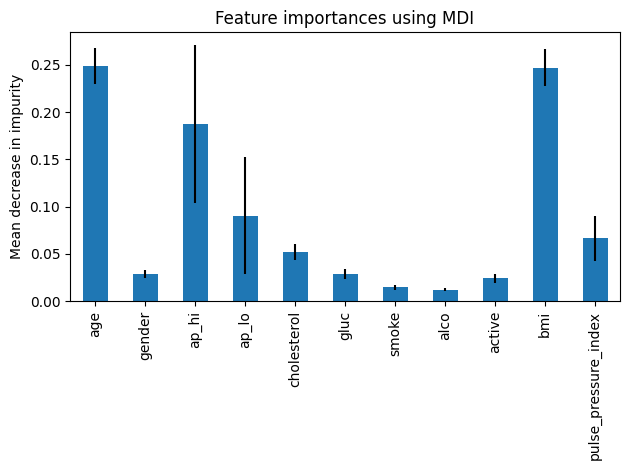

In [47]:
features_importances(X_train,y_train)

Після того як ми визначили які ознаки меншне використовуються, видалимо та заново навчимо

In [22]:
df_features_importence = df

df_features_importence = df_features_importence.drop(["gluc","smoke","alco","active"],axis=1)

In [23]:
X_features = df_features_importence.drop('cardio',axis=1)
y_features = df_features_importence['cardio']

X_features_train, X_features_test,y_features_train, y_features_test = train_test_split(X_features,y_features, test_size=0.1)

X_features_train= scaler.fit_transform(X_features_train)
X_features_test = scaler.transform(X_features_test)

In [26]:
for name, model in models.items():
    print(f"Навчання моделі {name}")

    model = model.fit(X_features_train,y_features_train)

    y_features_pred = model.predict(X_features_test)

    print(f'Accuracy: {np.round(accuracy_score(y_features_test, y_features_pred), 2)}')
    print(f'Precision: {np.round(precision_score(y_test,y_pred_test),2)}')
    print(f'F1-score: {np.round(f1_score(y_test,y_pred_test),2)}')

    

Навчання моделі Logistic Regression
Accuracy: 0.73
Precision: 0.77
F1-score: 0.73
Навчання моделі Decision Tree
Accuracy: 0.66
Precision: 0.77
F1-score: 0.73
Навчання моделі Random Forest
Accuracy: 0.69
Precision: 0.77
F1-score: 0.73
Навчання моделі KNN
Accuracy: 0.69
Precision: 0.77
F1-score: 0.73
Навчання моделі Gradient Boosting
Accuracy: 0.74
Precision: 0.77
F1-score: 0.73
Навчання моделі XGBoost
Accuracy: 0.74
Precision: 0.77
F1-score: 0.73
Навчання моделі AdaBoost


d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.73
Precision: 0.77
F1-score: 0.73
Навчання моделі Naive Bayes
Accuracy: 0.72
Precision: 0.77
F1-score: 0.73
Навчання моделі MLP Neural Network
Accuracy: 0.74
Precision: 0.77
F1-score: 0.73


GridSearchCV для моделі RadomForestClassifer

In [ ]:
model = RandomForestClassifier(random_state=0)

param_grid = {
    'n_estimators': [50, 100, 200],  # Кількість дере
    'max_depth': [None, 10, 20, 30],  # Глибина
    'min_samples_split': [2, 5, 10],  # Мінімальна кількість зразків для поділу
    'min_samples_leaf': [1, 2, 4]     # Мінімальна кількість зразків у листку
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv=5,scoring='accuracy')

grid_search.fit(X_train,y_train)

print(f'Best features: {grid_search.best_params_}')
print(f'Best features accuracy on validate: {grid_search.best_score_}')

Best features: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best features accuracy on validate: 0.7334501454851892


функція активації, кільксть прихованих шарів MLP, KNN- k, крос валідація для даних, оптимізаця гіпер параметрів, для звичайний потім ансамбиль, крос для ансамбиль

Використовуємо GridSearchCV для всіх моделей

In [12]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=20000, solver='lbfgs', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "MLP Neural Network": MLPClassifier(max_iter=2000,random_state=42)
}

In [27]:
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    "Decision Tree": {'max_depth': [2, 5, 10, 20], 'criterion': ['gini', 'entropy']},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]},
    "KNN": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    "Naive Bayes": {},
    "MLP Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
        'activation': ['relu', 'tanh'], 
        'solver': ['adam', 'sgd'], 
        'alpha': [0.0001, 0.001, 0.01]
    }
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
results = {}

for name, model in models.items():
    print(f"\nНалаштування моделі: {name}")
    param_grid = param_grids.get(name, {})
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=kf,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    results[name] = {
        "Best Params": grid_search.best_params_,
        "Best Score": grid_search.best_score_
    }
    
    # Predictions and metric calculations
    y_pred = grid_search.best_estimator_.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name]["Precision"] = precision
    results[name]["F1 Score"] = f1
    
    print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    print(f"Середній результат (Accuracy): {grid_search.best_score_:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")


# print("\nРезультати для всіх моделей:")
# for name, result in results.items():
#     print(f"{name}:")
#     print(f"  Найкращі параметри: {result['Best Params']}")
#     print(f"  Найкращий результат: {result['Best Score']:.2f}\n")


Налаштування моделі: Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Найкращі параметри для Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Середній результат (Accuracy): 0.72
Precision: 0.73
F1 Score: 0.73

Налаштування моделі: Decision Tree
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Найкращі параметри для Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Середній результат (Accuracy): 0.73
Precision: 0.74
F1 Score: 0.73

Налаштування моделі: Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Найкращі параметри для Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}
Середній результат (Accuracy): 0.73
Precision: 0.74
F1 Score: 0.74

Налаштування моделі: KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Найкращі параметри для KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Середній результат (Accuracy): 0.71
Precision: 0.73
F1 Score: 0.73

Налаштування мод

d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Найкращі параметри для AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Середній результат (Accuracy): 0.73
Precision: 0.74
F1 Score: 0.73

Налаштування моделі: Naive Bayes
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Найкращі параметри для Naive Bayes: {}
Середній результат (Accuracy): 0.71
Precision: 0.71
F1 Score: 0.70

Налаштування моделі: MLP Neural Network
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Найкращі параметри для MLP Neural Network: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'solver': 'adam'}
Середній результат (Accuracy): 0.73
Precision: 0.74
F1 Score: 0.74


Використовуємо підбір гіпер-параметрів для моделі яка собою є створений ансамбиль

In [9]:
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    "Decision Tree": {'max_depth': [2, 5, 10, 20], 'criterion': ['gini', 'entropy']},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]},
    "KNN": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
    "Naive Bayes": {},
    "MLP Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
        'activation': ['relu', 'tanh'], 
        'solver': ['adam', 'sgd'], 
        'alpha': [0.0001, 0.001, 0.01]
    }
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
results = {}

for name, model in models.items():
    print(f"\nНалаштування моделі: {name}")
    param_grid = param_grids.get(name, {})
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=kf,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X, y)
    
    best_models[name] = grid_search.best_estimator_
    results[name] = {
        "Best Params": grid_search.best_params_,
        "Best Score": grid_search.best_score_
    }
    
    maes, rmses = [], []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        best_model = grid_search.best_estimator_
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_val)
        
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        maes.append(mae)
        rmses.append(rmse)
    
    results[name]["MAE"] = np.mean(maes)
    results[name]["RMSE"] = np.mean(rmses)
    
    print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    print(f"Середній результат: {grid_search.best_score_:.2f}")
    print(f"MAE: {np.mean(maes):.2f}, RMSE: {np.mean(rmses):.2f}")

print("\nРезультати для всіх моделей:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Найкращі параметри: {result['Best Params']}")
    print(f"  Найкращий результат (accuracy): {result['Best Score']:.2f}")
    print(f"  MAE: {result['MAE']:.2f}, RMSE: {result['RMSE']:.2f}\n")


Налаштування моделі: Logistic Regression
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Найкращі параметри для Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Середній результат: 0.72
MAE: 0.28, RMSE: 0.52

Налаштування моделі: Decision Tree
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Найкращі параметри для Decision Tree: {'criterion': 'gini', 'max_depth': 5}
Середній результат: 0.73
MAE: 0.27, RMSE: 0.52

Налаштування моделі: Random Forest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Найкращі параметри для Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Середній результат: 0.73
MAE: 0.27, RMSE: 0.52

Налаштування моделі: KNN
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Найкращі параметри для KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Середній результат: 0.71
MAE: 0.29, RMSE: 0.54

Налаштування моделі: Gradient Boosting
Fitting 5 folds for each of 18 candidates, totalling 90 fit

d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Heart-Failure\env\Lib\sit

Найкращі параметри для AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Середній результат: 0.73
MAE: 0.27, RMSE: 0.52

Налаштування моделі: Naive Bayes
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Найкращі параметри для Naive Bayes: {}
Середній результат: 0.71
MAE: 0.29, RMSE: 0.54

Налаштування моделі: MLP Neural Network
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Найкращі параметри для MLP Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Середній результат: 0.73
MAE: 0.27, RMSE: 0.52

Результати для всіх моделей:
Logistic Regression:
  Найкращі параметри: {'C': 1, 'solver': 'liblinear'}
  Найкращий результат (accuracy): 0.72
  MAE: 0.28, RMSE: 0.52

Decision Tree:
  Найкращі параметри: {'criterion': 'gini', 'max_depth': 5}
  Найкращий результат (accuracy): 0.73
  MAE: 0.27, RMSE: 0.52

Random Forest:
  Найкращі параметри: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
  Найкр

точність всіх краще і для ансамблиь точність

In [13]:
param_gridss = {
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
results = {}

for name, model in models.items():
    print(f"\nНалаштування моделі: {name}")
    param_grid = param_gridss.get(name, {})
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=kf,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X, y)
    
    best_models[name] = grid_search.best_estimator_
    results[name] = {
        "Best Params": grid_search.best_params_,
        "Best Score": grid_search.best_score_
    }
    
    maes, rmses = [], []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        best_model = grid_search.best_estimator_
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_val)
        
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        maes.append(mae)
        rmses.append(rmse)
    
    results[name]["MAE"] = np.mean(maes)
    results[name]["RMSE"] = np.mean(rmses)
    
    print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    print(f"Середній результат: {grid_search.best_score_:.2f}")
    print(f"MAE: {np.mean(maes):.2f}, RMSE: {np.mean(rmses):.2f}")

print("\nРезультати для всіх моделей:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Найкращі параметри: {result['Best Params']}")
    print(f"  Найкращий результат (accuracy): {result['Best Score']:.2f}")
    print(f"  MAE: {result['MAE']:.2f}, RMSE: {result['RMSE']:.2f}\n")


Налаштування моделі: Gradient Boosting
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Найкращі параметри для Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Середній результат: 0.74
MAE: 0.26, RMSE: 0.51

Налаштування моделі: XGBoost
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Найкращі параметри для XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Середній результат: 0.74
MAE: 0.26, RMSE: 0.51

Результати для всіх моделей:
Gradient Boosting:
  Найкращі параметри: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
  Найкращий результат (accuracy): 0.74
  MAE: 0.26, RMSE: 0.51

XGBoost:
  Найкращі параметри: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
  Найкращий результат (accuracy): 0.74
  MAE: 0.26, RMSE: 0.51



In [16]:
from sklearn.model_selection import KFold


for name,model in models.items():
    print(f'Навчаємо модель {name} з використанням K-Fold')
    accuracy_scores = []
    kf = KFold(n_splits=6, shuffle=True, random_state=42)

    for train_index,test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train,y_train)

        y_pred_test = model.predict(X_test)
        
        accuracy_scores.append(accuracy_score(y_test,y_pred_test))

    print(f"Точність для кожного фолду: {accuracy_scores}")
    print(f"Середня точність: {np.mean(accuracy_scores):.2f}\n")

    accuracy_scores.clear()


Навчаємо модель Logistic Regression з використанням K-Fold
Точність для кожного фолду: [0.7225991649269311, 0.7190327070285316, 0.7294711203897007, 0.7172929714683368, 0.7247738343771747, 0.7305785123966942]
Середня точність: 0.72

Навчаємо модель Random Forest з використанням K-Fold
Точність для кожного фолду: [0.6934585942936674, 0.6948503827418232, 0.706767571329158, 0.6898921363952679, 0.6984168406402227, 0.6989125706829056]
Середня точність: 0.70

Навчаємо модель KNN з використанням K-Fold
Точність для кожного фолду: [0.6916318719554627, 0.6959812108559499, 0.6987647877522617, 0.6875434933890049, 0.691196938065414, 0.7004784688995215]
Середня точність: 0.69

Навчаємо модель MLP Neural Network з використанням K-Fold
Точність для кожного фолду: [0.7305149617258176, 0.7233820459290188, 0.7254697286012526, 0.7086812804453723, 0.7286012526096033, 0.7307525010874293]
Середня точність: 0.72



In [16]:
import joblib

param_grids = {
    # "Logistic Regression": {'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    # "Decision Tree": {'max_depth': [None, 5, 10, 20], 'criterion': ['gini', 'entropy']},
    # "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    # "KNN": {'n_neighbors': [5, 8, 10, 12], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
    "Gradient Boosting": {'n_estimators': [200], 'learning_rate': [0.1], 'max_depth': [5]},
    # "XGBoost": {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]},
    # "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.001]},
    # "Naive Bayes": {},
    # "MLP Neural Network": {
    #     'hidden_layer_sizes': [(50,), (100,), (100, 50)], 
    #     'activation': ['relu', 'tanh'], 
    #     'solver': ['adam', 'sgd'], 
    #     'alpha': [0.0001, 0.001, 0.01]
    # }
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
results = {}

for name, model in models.items():
    print(f"\nНалаштування моделі: {name}")
    param_grid = param_grids.get(name, {})
    
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=kf,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    joblib.dump(grid_search.best_estimator_, f'{name}_model_predict.pkl')
    
    best_models[name] = grid_search.best_estimator_
    results[name] = {
        "Best Params": grid_search.best_params_,
        "Best Score": grid_search.best_score_
    }
    print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    print(f"Середній результат: {grid_search.best_score_:.2f}")

print("\nРезультати для всіх моделей:")
for name, result in results.items():
    print(f"{name}:")
    print(f"  Найкращі параметри: {result['Best Params']}")
    print(f"  Найкращий результат: {result['Best Score']:.2f}\n")


Налаштування моделі: Gradient Boosting
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Найкращі параметри для Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Середній результат: 0.73

Налаштування моделі: XGBoost
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Найкращі параметри для XGBoost: {}
Середній результат: 0.73

Результати для всіх моделей:
Gradient Boosting:
  Найкращі параметри: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
  Найкращий результат: 0.73

XGBoost:
  Найкращі параметри: {}
  Найкращий результат: 0.73

